In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer
from files.Observer import TimeEvolutionObserverLog
from plot.Trajectory import Trajectory
from plot.Statistics import Statistics

## Simulation setup

#### Parameters

In [7]:
nr_particles = 10**1
nr_steps = 10**5
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
mfp = np.array([3.75*10**13/4.0, 3.75*10**13/4.0, 7.2*10**13])  # [m]
delta_rho_div_phi = 1 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]; 1pc
all_steps = False

#### Source

In [3]:
sim = Simulation()

source = Source(gyro_radius, mfp, source_pos, nr_particles)
sim.add_source(source)

start simulation
source


#### Observer

In [4]:
substeps = [False, False, True] # observe only steps (no substeps)
#steps = [0,1,2] # [-1] to observe all
steps = np.logspace(0, 5, 100)
steps_int32 = np.array(steps, dtype=np.int32) # np.array([-1])
min_step = 1
max_step = 10**4
nr_steps = 100
observer = TimeEvolutionObserverLog(min_step, max_step, nr_steps, substeps)#Observer(steps_int32, substeps)
sim.add_observer(observer)

observer


In [5]:
%time sim.run_simulation(nr_steps)
sim.save_data('data')

CPU times: user 1.3 s, sys: 2.68 ms, total: 1.31 s
Wall time: 1.3 s


## Analyze statistics


init statistics plotting class


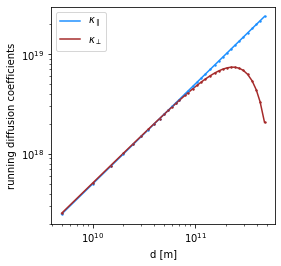

In [10]:
df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)